In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from files.Simulation import Simulation
from files.Source import Source
from files.Observer import Observer
from files.Propagator import Propagator
from files.Observer import TimeEvolutionObserverLog
from plot.Trajectory import Trajectory
from plot.Statistics import Statistics

## Simulation setup

#### Simulation setup

In [2]:
dimensions = 3
sim = Simulation()

start simulation


#### Source 

In [3]:
nr_particles = 1*10**1
source_pos = np.array([1.0, 1.0, 1.0], dtype=np.float32)
delta_rho_div_phi = 1 #1/2**0.5 # (delta_r_rho / delta_r_phi)
gyro_radius = 10**11 # [m]; 1pc

source = Source(gyro_radius, source_pos, nr_particles, dimensions)
sim.add_source(source)

Source initialized


#### Propagator

In [ ]:
nr_steps = 2*10**5
step_size = 0.5*10**10 # [m]
mfp = np.array([2.13*10**12/2.0, 2.13*10**12/2.0, 2.1078*10**12], dtype=np.float32)  # [m]

propagator = Propagator(nr_steps, step_size, mfp)
#propagator.set_pitch_angle_const(False)
propagator.get_description()
sim.add_propagator(propagator)

#### Observer

In [ ]:
substeps = [False, False, True] # observe only steps (no substeps)
min_step = 1
max_step = nr_steps
nr_obs_steps = 200

observer = TimeEvolutionObserverLog(min_step, max_step, nr_obs_steps, substeps)
sim.add_observer(observer)

In [ ]:
%time sim.run_simulation()
sim.save_data('data')

## Analyze statistics


init statistics plotting class


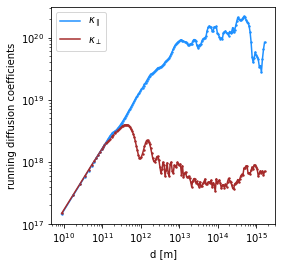

In [7]:
df = pd.read_pickle("data.pkl")
df_time_evolution_observer = df.loc[df['radius'] == -1.0]
dimensions = 3
sta = Statistics(df_time_evolution_observer, dimensions)
errors = False
df_kappas = sta.plot_diffusion_coefficients(errors)

In [8]:
rwp_d = df_kappas['d'].tolist()
rwp_kappa_perp = df_kappas['kappa_perp'].tolist()
rwp_kappa_para = df_kappas['kappa_para'].tolist()

In [26]:
### load crpropa data
crp_d = np.load('data/E_3e+16_bB_0.5_seeds_50_149_nr_20_d.npy')
crp_kappa_perp = np.load('data/E_3e+16_bB_0.5_seeds_50_149_nr_20_kappa_perp.npy')
crp_kappa_para = np.load('data/E_3e+16_bB_0.5_seeds_50_149_nr_20_kappa_para.npy')

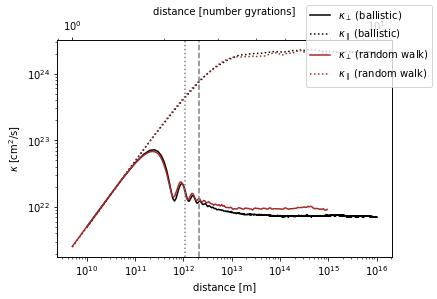

In [27]:
fig, ax1 = plt.subplots()

ax1.plot(crp_d, np.array(crp_kappa_perp)*10**4, label='$\kappa_\perp$ (ballistic)', color='k')
ax1.plot(crp_d, np.array(crp_kappa_para)*10**4, linestyle=':', label='$\kappa_\parallel$ (ballistic)', color='k')
ax1.plot(rwp_d, np.array(rwp_kappa_perp)*10**4, label='$\kappa_\perp$ (random walk)', color='brown')
ax1.plot(rwp_d, np.array(rwp_kappa_para)*10**4, linestyle=':', label='$\kappa_\parallel$ (random walk)', color='brown')

ax1.set_xlabel('distance [m]')
ax1.axvline(x=mfp[1], c='grey', ls=':')
ax1.axvline(x=mfp[2], c='grey', ls='--')
ax1.loglog()
ax1.set_ylabel('$\kappa$ [cm$^2$/s]')

ax2 = ax1.twiny()
#ax2.scatter(np.array([rwp_d[0], rwp_d[-1]]) / (2 * np.pi * gyro_radius), np.ones(2)*kappa_perp_mean*10**4, s=0.0001)
ax2.set_xlabel('distance [number gyrations]')
ax2.loglog()

fig.legend()
plt.show()
#plt.savefig('kappas_bB05.pdf')